In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
df_features = pd.read_csv('../../data/transaction_features.csv')
df_features.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,GAMBLING_CAT,CREDIT_SCORE
0,C02COQEVYU,26615,0,951493,0.0000,35.7503,44.4010,1889,945,0.5003,...,0.0000,0.0010,33269,19286,0.5797,1.2500,0.0000,0.0350,High,401
1,C02OZKC0ZF,77158,84173,84173,1.0909,1.0909,1.0000,5818,111,0.0191,...,0.0338,0.0338,70144,25114,0.3580,0.9091,0.8333,0.8333,No,705
2,C03FHP2D0A,27825,9275,726550,0.3333,26.1114,78.3342,1157,860,0.7433,...,0.0922,0.0012,30917,17618,0.5698,1.1111,3.3334,0.0426,High,385
3,C03PVPPHOY,80657,153248,709782,1.9000,8.8000,4.6316,6857,3686,0.5376,...,0.0144,0.0031,80657,40205,0.4985,1.0000,0.5263,0.1136,High,604
4,C04J69MUX0,163604,1336103,490813,8.1667,3.0000,0.3673,1978,322,0.1628,...,0.0077,0.0211,136337,62766,0.4604,0.8333,0.1020,0.2778,High,699


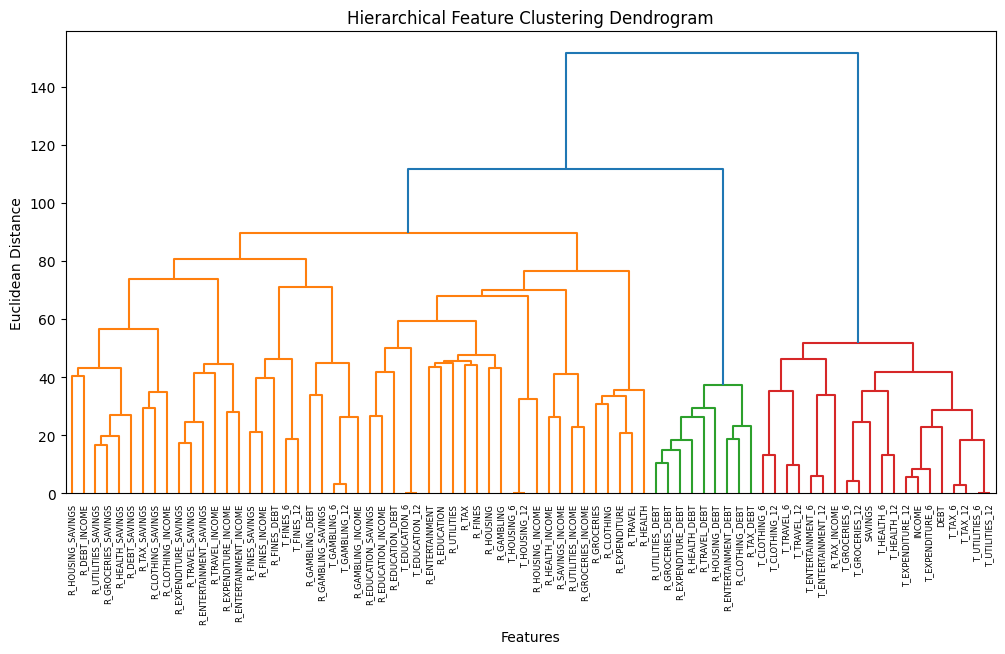

In [26]:
scaler = StandardScaler()

df= df_features.drop(['CUST_ID','GAMBLING_CAT','CREDIT_SCORE'], axis=1)
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

df_transposed = df_scaled.transpose()

# Perform hierarchical clustering on features
linked = linkage(df_transposed, method='ward', metric='euclidean')

# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=df_transposed.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Feature Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

In [27]:
# find correlation between features and credit score
corr = {}
for col in df.columns:
    corr[col] = df_features['CREDIT_SCORE'].corr(df_features[col])

corr

{'INCOME': 0.10133606837739514,
 'SAVINGS': 0.1391054198246111,
 'DEBT': -0.18212969857137665,
 'R_SAVINGS_INCOME': 0.38035938028024086,
 'R_DEBT_INCOME': -0.7882054203409643,
 'R_DEBT_SAVINGS': -0.6319013218751843,
 'T_CLOTHING_12': 0.06944083723022966,
 'T_CLOTHING_6': 0.011359452831350099,
 'R_CLOTHING': -0.1265837274650938,
 'R_CLOTHING_INCOME': -0.03148584322089327,
 'R_CLOTHING_SAVINGS': -0.3615355850237187,
 'R_CLOTHING_DEBT': 0.2475889932355968,
 'T_EDUCATION_12': -0.06482743008270568,
 'T_EDUCATION_6': -0.06494127339363896,
 'R_EDUCATION': 0.0052505812297980745,
 'R_EDUCATION_INCOME': -0.34276662640259026,
 'R_EDUCATION_SAVINGS': -0.33928082573108687,
 'R_EDUCATION_DEBT': 0.03660030683588447,
 'T_ENTERTAINMENT_12': 0.1841036940497091,
 'T_ENTERTAINMENT_6': 0.1814272735433365,
 'R_ENTERTAINMENT': 0.05816397808471133,
 'R_ENTERTAINMENT_INCOME': 0.000681562355112847,
 'R_ENTERTAINMENT_SAVINGS': -0.27971228915978585,
 'R_ENTERTAINMENT_DEBT': 0.2606569160747074,
 'T_FINES_12': 0.01

In [35]:
# Label each feature with its cluster group
num_clusters = 10  # Adjust the number of clusters as needed
labels = fcluster(linked, t=num_clusters, criterion='maxclust')

# Assign cluster labels to features
df_transposed['Cluster'] = labels

# Display the clustered features
df_transposed['Cluster'].value_counts()

for i in range(1,13):
    print(f"Cluster {i}")
    cluster = {}
    for feature in df_transposed[df_transposed['Cluster'] == i].index.values:
        cluster[feature] = abs(corr[feature])
    
    # Sort the features by correlation to credit score in descending order
    cluster = sorted(cluster.items(), key=lambda x: x[1], reverse=True)
    for feature, correlation in cluster:
        print(f"{feature}: {correlation}")
        
    print()

Cluster 1
T_ENTERTAINMENT_12: 0.1841036940497091
DEBT: 0.18212969857137665
T_ENTERTAINMENT_6: 0.1814272735433365
R_TAX_INCOME: 0.16468975592329088
SAVINGS: 0.1391054198246111
T_HEALTH_12: 0.138517896949421
T_UTILITIES_12: 0.12313944431932584
T_UTILITIES_6: 0.12311302848101187
T_TAX_12: 0.11859886780159581
T_TAX_6: 0.11581818759202045
INCOME: 0.10133606837739514
T_EXPENDITURE_12: 0.09341668364891641
T_TRAVEL_12: 0.07981619308140404
T_CLOTHING_12: 0.06944083723022966
T_EXPENDITURE_6: 0.056653028664413366
T_HEALTH_6: 0.05587498627733644
T_GROCERIES_12: 0.032728229289979024
T_TRAVEL_6: 0.018910335863306277
T_GROCERIES_6: 0.016259588544627585
T_CLOTHING_6: 0.011359452831350099

Cluster 2
R_UTILITIES_DEBT: 0.2819577951256753
R_GROCERIES_DEBT: 0.27610117390097816
R_HEALTH_DEBT: 0.2716501932007181
R_EXPENDITURE_DEBT: 0.2692311828354478
R_ENTERTAINMENT_DEBT: 0.2606569160747074
R_TAX_DEBT: 0.2592228161628745
R_CLOTHING_DEBT: 0.2475889932355968
R_TRAVEL_DEBT: 0.21128000402881053
R_HOUSING_DEBT: 0

In [52]:
df_transposed[['Cluster',0]].groupby('Cluster').count()

,0
Cluster,
1,1
2,1
3,1
4,1
5,65
6,7
7,3
8,1
9,1


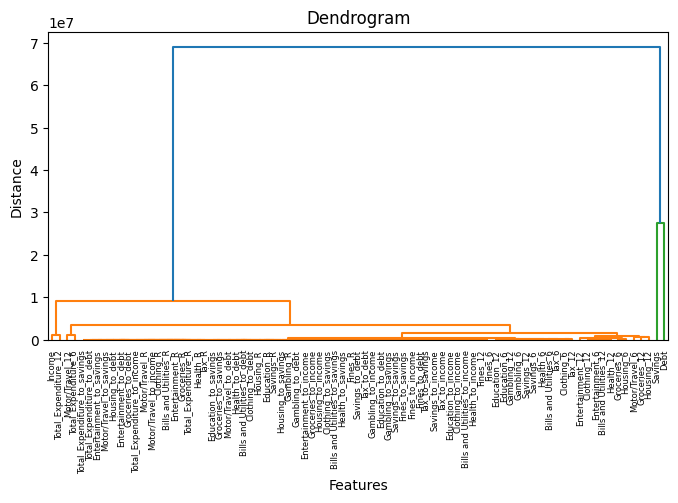

In [35]:
df_transposed = df.transpose()

# Step 1: Calculate the linkage matrix
linkage_matrix = linkage(df_transposed, method='ward')  # You can choose a different linkage method as needed

# Step 2: Plot the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=df_transposed.index,)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

In [36]:
# Step 3: Perform clustering based on the dendrogram
n_clusters = 5  # You can choose the number of clusters
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_transposed['Cluster'] = cluster.fit_predict(df_transposed)

df_transposed

/Users/conorosullivan/Documents/git/XAI-tutorial/XAI/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Cluster
Income,37068.120000,66131.610000,3.136714e+05,34097.950000,7.670258e+04,3.392171e+05,226683.250000,0.000000,0.000000,53501.810000,...,3.815580e+05,84918.240000,3.053141e+05,1.873155e+05,1.927532e+05,112563.330000,14832.600000,77265.120000,2.815522e+05,1
Savings,68487.760000,117858.310000,8.125819e+05,649655.700000,1.072402e+06,1.427051e+06,410528.720000,58366.060000,33568.440000,633104.710000,...,2.064743e+06,74303.460000,2.500275e+06,2.304453e+06,1.052036e+06,306172.260000,19776.800000,48202.090000,1.961634e+06,2
Debt,314902.490000,314943.600000,3.566469e+06,29790.840000,6.272407e+05,5.825177e+05,985268.940000,124828.050000,57419.700000,61428.000000,...,2.817034e+06,186112.480000,2.560788e+06,1.835377e+06,2.448146e+06,228503.560000,230964.810000,611741.260000,3.011686e+06,3
Bills and Utilities_12,1235.140000,4916.630000,1.510105e+04,1658.840000,5.529020e+03,1.436220e+04,13348.920000,535.850000,527.810000,3171.410000,...,1.460285e+04,5616.100000,1.924617e+04,9.616840e+03,1.463234e+04,3491.410000,481.500000,2726.860000,1.604218e+04,0
Bills and Utilities_6,620.180000,2471.090000,7.593780e+03,832.310000,2.780690e+03,7.174600e+03,6712.110000,268.910000,267.050000,1593.630000,...,7.380780e+03,2815.330000,9.614350e+03,4.832920e+03,7.284590e+03,1751.860000,242.170000,1368.860000,8.085250e+03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total_Expenditure_6,20659.170000,36783.040000,1.253671e+05,21192.780000,3.859801e+04,1.190320e+05,97730.170000,10262.540000,10913.150000,24909.580000,...,1.410724e+05,40089.320000,1.302698e+05,8.092015e+04,9.225859e+04,61767.320000,10070.380000,35144.420000,1.161575e+05,4
Total_Expenditure_R,0.585196,0.561772,5.075893e-01,0.590450,5.384418e-01,5.088081e-01,0.547536,0.545075,0.617693,0.502831,...,5.213156e-01,0.566512,4.736089e-01,5.140790e-01,5.121403e-01,0.548734,0.570306,0.495792,5.033244e-01,0
Total_Expenditure_to_income,0.952381,0.990099,7.874016e-01,1.052632,9.345794e-01,6.896552e-01,0.787402,0.000000,0.000000,0.925926,...,7.092199e-01,0.833333,9.009009e-01,8.403361e-01,9.345795e-01,1.000000,1.190476,0.917431,8.196721e-01,0
Total_Expenditure_to_savings,0.515464,0.555556,3.039514e-01,0.055249,6.684492e-02,1.639344e-01,0.434783,0.322581,0.526316,0.078247,...,1.310616e-01,0.952381,1.100110e-01,6.830601e-02,1.712329e-01,0.367647,0.892857,1.470588,1.176471e-01,0


In [38]:
df_transposed.sort_values(by=['Cluster'])

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Cluster
Groceries_6,3186.700000,5580.76,17320.30,2450.220000,11768.15,16344.14,15347.55,616.900000,599.030000,4663.27,...,1.654094e+04,6402.16,22059.16,2.065477e+04,31679.47,4019.58,1237.54,3139.370000,18414.32,0
Housing_to_savings,0.058198,0.00,0.00,0.011468,0.00,0.00,0.00,0.026452,0.044723,0.00,...,1.896193e-02,0.00,0.00,1.722491e-02,0.00,0.00,0.00,0.326985,0.00,0
Housing_to_income,0.107527,0.00,0.00,0.218491,0.00,0.00,0.00,0.000000,0.000000,0.00,...,1.026096e-01,0.00,0.00,2.119098e-01,0.00,0.00,0.00,0.203991,0.00,0
Housing_R,0.506097,0.00,0.00,0.506098,0.00,0.00,0.00,0.506102,0.506095,0.00,...,5.060984e-01,0.00,0.00,5.060985e-01,0.00,0.00,0.00,0.506098,0.00,0
Housing_6,2017.220000,0.00,0.00,3770.480000,0.00,0.00,0.00,781.360000,759.790000,0.00,...,1.981451e+04,0.00,0.00,2.008907e+04,0.00,0.00,0.00,7976.810000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Income,37068.120000,66131.61,313671.42,34097.950000,76702.58,339217.10,226683.25,0.000000,0.000000,53501.81,...,3.815580e+05,84918.24,305314.12,1.873155e+05,192753.21,112563.33,14832.60,77265.120000,281552.25,1
Savings,68487.760000,117858.31,812581.87,649655.700000,1072402.36,1427051.26,410528.72,58366.060000,33568.440000,633104.71,...,2.064743e+06,74303.46,2500275.13,2.304453e+06,1052036.23,306172.26,19776.80,48202.090000,1961634.50,2
Debt,314902.490000,314943.60,3566468.74,29790.840000,627240.69,582517.65,985268.94,124828.050000,57419.700000,61428.00,...,2.817034e+06,186112.48,2560787.84,1.835377e+06,2448145.95,228503.56,230964.81,611741.260000,3011685.92,3
Motor/Travel_12,18608.420000,0.00,120252.71,10218.930000,20069.18,104520.01,69789.46,14586.420000,14237.780000,21317.91,...,1.067872e+05,27229.33,90477.02,3.529072e+04,45307.51,51316.72,7273.48,0.000000,97381.36,4


In [21]:
# Perform hierarchical clustering
linked = linkage(df_features, method='ward')  # You can choose different linkage methods (e.g., 'single', 'complete')

# Plot the dendrogram
dendrogram(linked, orientation='top', labels=[f'Feature {i+1}' for i in range(df_features.shape[1])])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


ValueError: Dimensions of Z and labels must be consistent.

In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

np.shape(X_scaled)

df = X_scaled.transpose()

# Perform hierarchical clustering on features
linked = linkage(df, method='ward', metric='euclidean')

# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending')
plt.title('Hierarchical Feature Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

(999, 4)